In [33]:
import pandas as pd
birddata = pd.read_csv("bird_tracking.csv", index_col = 0)
sanne_data = birddata[birddata.bird_name == "Sanne"]
sanne_data

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne
40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne
40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne
40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne
40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne
...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


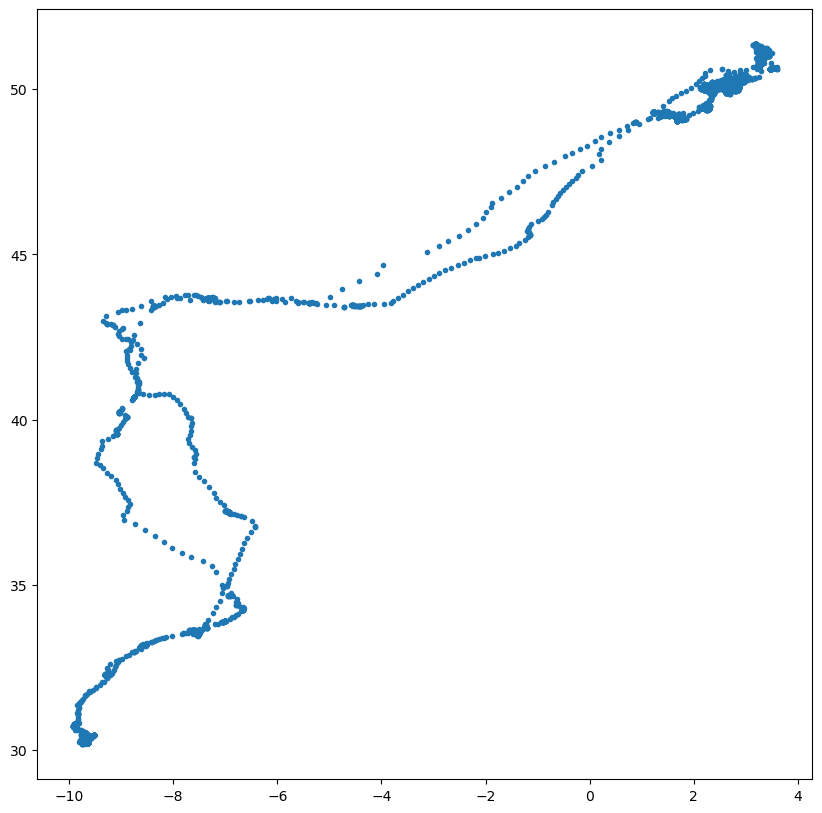

In [2]:
import matplotlib.pyplot as plt
import numpy as np
ix = birddata.bird_name == "Eric"
x , y = birddata.longitude[ix] , birddata.latitude[ix]
plt.figure(figsize = (10,10))
plt.plot(x,y,".")
plt.savefig("Eric Bird Trajectory.pdf")

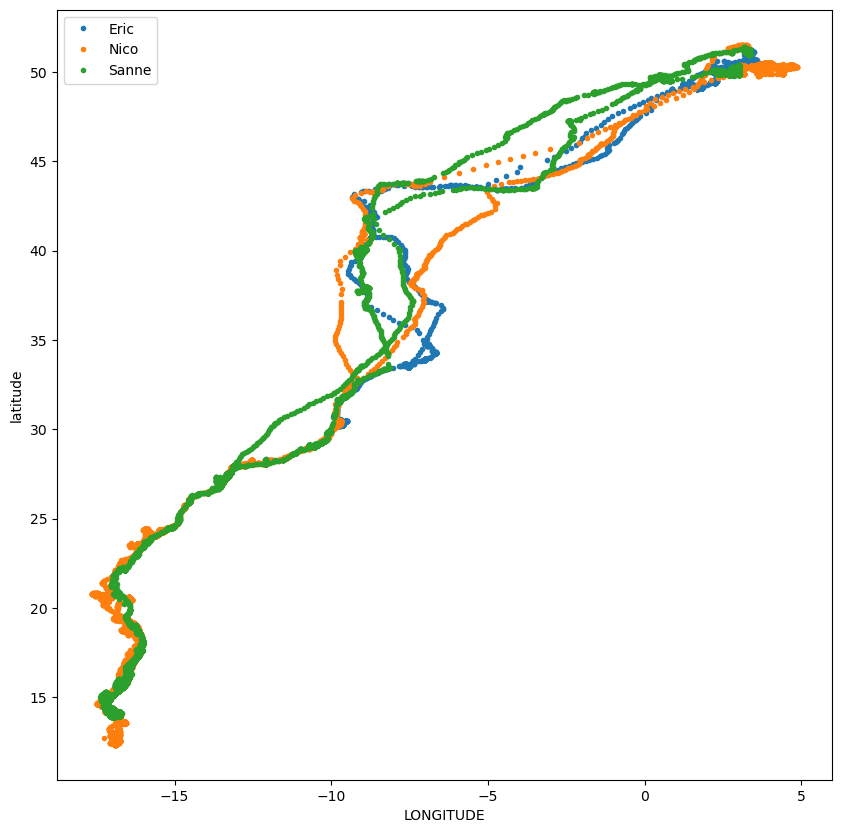

In [3]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize = (10,10))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x , y = birddata.longitude[ix] , birddata.latitude[ix]
    plt.plot(x,y,".", label = bird_name)
plt.xlabel("LONGITUDE")
plt.ylabel("latitude")
plt.legend(loc = "upper left")
plt.savefig("ALL Bird Trajectory.pdf")

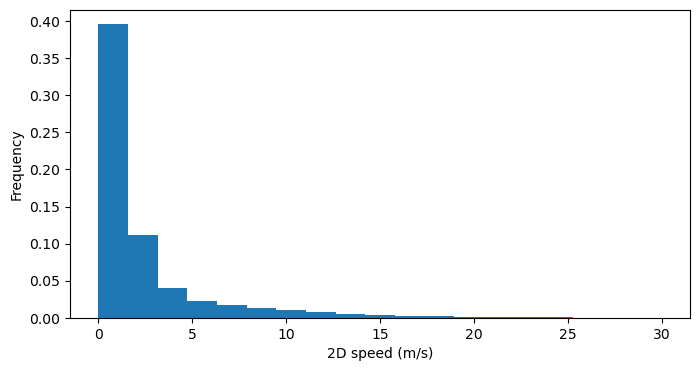

In [4]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)

plt.figure(figsize = (8,4))
plt.hist(speed[~ind], bins = np.linspace(0,30,20), density = True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("EricSpeed.pdf")


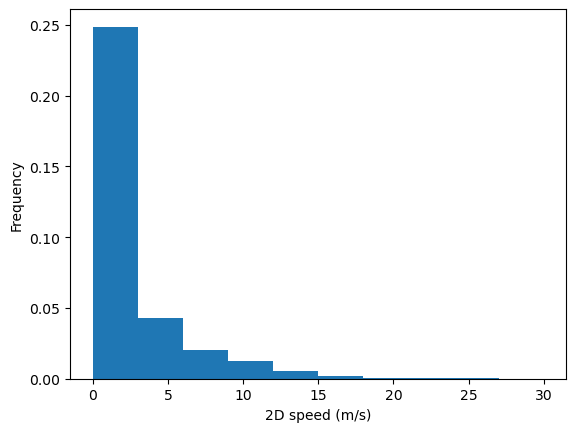

In [5]:
birddata.speed_2d.plot(kind = 'hist', range = [0,30], density = True)
plt.xlabel("2D speed (m/s)")
plt.savefig("EricSpeedUsingPD.pdf")


In [6]:
#DATETIME


In [7]:
birddata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [8]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [9]:
import datetime
datetime.datetime.today()

datetime.datetime(2023, 10, 20, 18, 16, 53, 116302)

In [10]:
time_1 = datetime.datetime.today()

In [11]:
time_2 = datetime.datetime.today()

In [12]:
time_2 - time_1

datetime.timedelta(microseconds=3734)

In [13]:
time_2 = datetime.datetime.today()

In [14]:
time_2 - time_1

datetime.timedelta(microseconds=19992)

In [15]:
date_str = birddata.date_time[0]
type(date_str)

str

In [16]:
date_str

'2013-08-15 00:18:08+00'

In [17]:
date_str[:-3]

'2013-08-15 00:18:08'

In [18]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                      (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
timestamps[:5]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42)]

In [19]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [20]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [26]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)
elapsed_days
# approx this many days have passed

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [ ]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days = 1))
plt.xlabel("Observations")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

In [ ]:
#CALCULATING DAILY MEAN SPEED
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(birddata.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("mean speed (m/s)")
plt.savefig("daily_mean_speed.pdf")